**Final Project Submission**
Please fill out:

* Student name: **Group 7**
* Student pace: **Part time**
* Scheduled project review date/time: **11th September 2023**
* Instructor name: **Asha Deen**
* Blog post URL:

**EXPLORATION**

In [1]:
# Import libraries

# Data manipulation and analysis
import numpy as np
import pandas as pd

# Regression and statistical testing
import statsmodels.api as sm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


In [2]:
# Load the dataset
kc_house_data = pd.read_csv('kc_house_data.csv')

# View the contents of the df
kc_house_data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [3]:
# Check the structure of the df
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Observation:**

Our dataframe, kc_house_data, has 21 columns and 21,597 rows.
The columns include various types of data:
1. Integer columns: 'id', 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'zipcode', 'sqft_living15', and 'sqft_lot15'.
2. Float columns: 'price', 'bathrooms', 'floors', 'yr_renovated', 'lat', and 'long'.
3. Object (string) columns: 'date', 'waterfront', 'view', 'condition', 'grade', and 'sqft_basement'.
* Some columns contain missing values (NaN) like 'waterfront', 'view', and 'yr_renovated'.

In [4]:
# Perform basic statistics to understand the data
kc_house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**DATA PREPROCESSNG**

**1. Cleaning kc_house_data**



In [5]:
# Find duplicate values in House IDs
kc_house_data[kc_house_data.duplicated(subset='id', keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,NONE,...,6 Low Average,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,NONE,...,8 Good,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,NO,NONE,...,9 Better,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


**Observation:**

We've identified 353 duplicate entries in our dataset. Given that our project's primary objective is to model the most up-to-date house prices in King County, we will retain the latest entries while removing the duplicates.

In [6]:
# Convert the date column to datetime datatype
kc_house_data['date'] = pd.to_datetime(kc_house_data['date'])

# Sort by 'id' and 'date' in descending order
kc_house_data.sort_values(by=['id', 'date'], ascending=[True, False])

# Drop duplicates keeping the most recent occurence
kc_house_data.drop_duplicates(subset='id', keep='first', inplace=True)

# Confirm duplicates are dropped
print("Number of duplicates:", len(kc_house_data[kc_house_data.duplicated(subset='id', keep=False)]))

Number of duplicates: 0


`PRICE AND ID COLUMNS`

In [7]:
# Reorder columns so that the target(dependent) variable is the first column
# Exclude 'id' column
column_headers = list(kc_house_data.columns)
column_headers = [column_headers[2]]+[column_headers[1]]+column_headers[3:]
kc_house_data = kc_house_data[column_headers]

# Convert price to integer
kc_house_data = kc_house_data.astype({'price':'int'})

# Confirm changes
kc_house_data.head()

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,2014-10-13,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000,2014-12-09,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000,2015-02-25,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000,2014-12-09,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000,2015-02-18,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


`DATE COLUMN`

In [8]:
# Split 'date' column into 'month' and 'year' columns
kc_house_data['month'] = kc_house_data['date'].dt.month
kc_house_data['year'] = kc_house_data['date'].dt.year


# Find the age of the house
kc_house_data['age'] = kc_house_data['year'] - kc_house_data['yr_built']
# Confirm changes
kc_house_data.head()

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,age
0,221900,2014-10-13,3,1.00,1180,5650,1.0,NaN,NONE,Average,...,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014,59
1,538000,2014-12-09,3,2.25,2570,7242,2.0,NO,NONE,Average,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014,63
2,180000,2015-02-25,2,1.00,770,10000,1.0,NO,NONE,Average,...,1933,NaN,98028,47.7379,-122.233,2720,8062,2,2015,82
3,604000,2014-12-09,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014,49
4,510000,2015-02-18,3,2.00,1680,8080,1.0,NO,NONE,Average,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015,28


In [9]:
# Convert the months into seasons of the year
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
}

kc_house_data['season'] = kc_house_data['month'].map(month_to_season)
kc_house_data

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,age,season
0,221900,2014-10-13,3,1.00,1180,5650,1.0,NaN,NONE,Average,...,0.0,98178,47.5112,-122.257,1340,5650,10,2014,59,Fall
1,538000,2014-12-09,3,2.25,2570,7242,2.0,NO,NONE,Average,...,1991.0,98125,47.7210,-122.319,1690,7639,12,2014,63,Winter
2,180000,2015-02-25,2,1.00,770,10000,1.0,NO,NONE,Average,...,NaN,98028,47.7379,-122.233,2720,8062,2,2015,82,Winter
3,604000,2014-12-09,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,0.0,98136,47.5208,-122.393,1360,5000,12,2014,49,Winter
4,510000,2015-02-18,3,2.00,1680,8080,1.0,NO,NONE,Average,...,0.0,98074,47.6168,-122.045,1800,7503,2,2015,28,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000,2014-05-21,3,2.50,1530,1131,3.0,NO,NONE,Average,...,0.0,98103,47.6993,-122.346,1530,1509,5,2014,5,Spring
21593,400000,2015-02-23,4,2.50,2310,5813,2.0,NO,NONE,Average,...,0.0,98146,47.5107,-122.362,1830,7200,2,2015,1,Winter
21594,402101,2014-06-23,2,0.75,1020,1350,2.0,NO,NONE,Average,...,0.0,98144,47.5944,-122.299,1020,2007,6,2014,5,Summer
21595,400000,2015-01-16,3,2.50,1600,2388,2.0,NaN,NONE,Average,...,0.0,98027,47.5345,-122.069,1410,1287,1,2015,11,Winter


`BEDROOMS COLUMN`

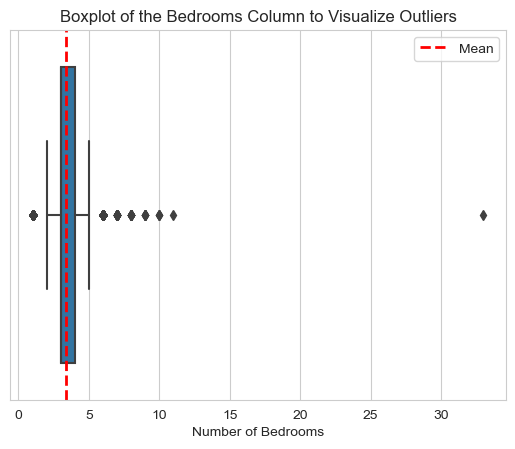

In [10]:
# Plot a boxplot to visualize the column data
sns.set_style("whitegrid")
sns.boxplot(x = kc_house_data.bedrooms)
plt.axvline(kc_house_data.bedrooms.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.xlabel('Number of Bedrooms')
plt.title('Boxplot of the Bedrooms Column to Visualize Outliers')
plt.legend();

**Observation:**

The majority of houses in King County have bedrooms typically ranging from 1 to 5 bedrooms. Some homes have between 5 and roughly 11 bedrooms. However, there are extreme outliers with as many as 33 bedrooms. To ensure the accuracy of our analysis and modeling, we will exclude the entry with 33 bedrooms as it could significantly skew our results.

In [11]:
# Remove the extreme outlier for initial model
kc_house_data.drop(kc_house_data[kc_house_data.bedrooms == 33].index, inplace=True)

# Confirm Drop
kc_house_data['bedrooms'].value_counts()

bedrooms
3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
Name: count, dtype: int64

`BATHROOMS COLUMN`

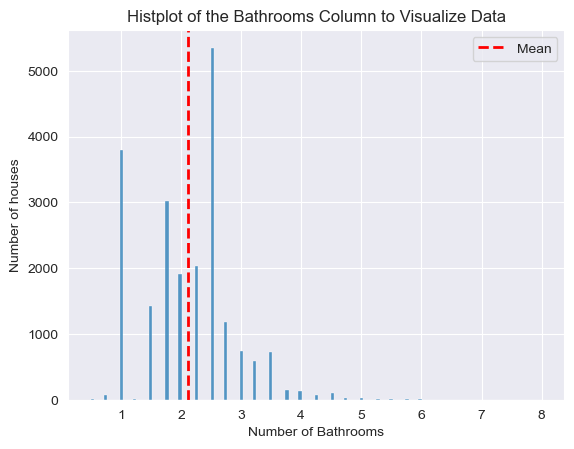

In [12]:
# Plot a histplot to visualize the bathrooms data
sns.set_style("darkgrid")
sns.histplot(kc_house_data.bathrooms)
plt.axvline(kc_house_data.bathrooms.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of houses')
plt.title('Histplot of the Bathrooms Column to Visualize Data')
plt.legend();

**Observation:**

Houses with fewer than one bathroom are not aligned with our analysis and model, which focuses on assessing decent housing setups. Therefore, we should remove this data from our dataset.

The bathrooms data is positively skewed.

In [13]:
# Remove houses with less than 1 bathroom
kc_house_data.drop(kc_house_data[kc_house_data.bathrooms < 1].index, inplace=True)

# Confirm Drop
kc_house_data['bathrooms'].value_counts()

bathrooms
2.50    5352
1.00    3794
1.75    3019
2.25    2031
2.00    1913
1.50    1429
2.75    1182
3.00     747
3.50     729
3.25     586
3.75     155
4.00     134
4.50      99
4.25      79
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64

`WATERFRONT COLUMN`

In [14]:
# View the frequencies of Yes and No
kc_house_data.waterfront.value_counts()

waterfront
NO     18857
YES      141
Name: count, dtype: int64

In [15]:
# Explore missing values
print("Number of missing values:", kc_house_data.waterfront.isna().sum())

Number of missing values: 2347


In [16]:
# Calculate the probabilities for each unique value in the 'waterfront' column
probabilities = kc_house_data['waterfront'].value_counts(normalize=True).to_dict()

# Apply a lambda function to impute missing values based of probalibility
kc_house_data['waterfront'] = kc_house_data['waterfront'].apply(
    lambda x: np.random.choice(list(probabilities.keys()), p=list(probabilities.values())) if pd.isna(x) else x)

# Confirm there are no missing values
print("Number of missing values:", kc_house_data.waterfront.isna().sum())

# View frequencies
kc_house_data.waterfront.value_counts()

Number of missing values: 0


waterfront
NO     21184
YES      161
Name: count, dtype: int64

`VIEW COLUMN`

In [17]:
# View the counts of occurences
kc_house_data.view.value_counts()

view
NONE         19190
AVERAGE        950
GOOD           504
FAIR           327
EXCELLENT      311
Name: count, dtype: int64

In [18]:
# Check for missing values
print('Number of missing values:', kc_house_data.view.isna().sum())

Number of missing values: 63


In [19]:
# Use Probability to fill the missing values
view_probabilities = list(kc_house_data['view'].value_counts(normalize=True).values)
unique_values2 = kc_house_data['view'].dropna().unique()

def replace_nan_with_random(x):
    if pd.isna(x):
        return np.random.choice(unique_values2, p=view_probabilities)
    else:
        return x

kc_house_data['view'] = kc_house_data['view'].apply(replace_nan_with_random)

# View the new count occurences  after filling null
kc_house_data.view.value_counts()

view
NONE         19243
AVERAGE        952
GOOD           510
FAIR           327
EXCELLENT      313
Name: count, dtype: int64

`GRADE COLUMN`

In [20]:
# Check for missing values
print("Number of missing values:",kc_house_data['grade'].isna().sum())

Number of missing values: 0


In [21]:
# View the counts of occurences
kc_house_data['grade'].value_counts()

grade
7 Average        8871
8 Good           6040
9 Better         2606
6 Low Average    1968
10 Very Good     1130
11 Excellent      396
5 Fair            219
12 Luxury          88
4 Low              14
13 Mansion         13
Name: count, dtype: int64

`SQFT BASEMENT COLUMN`

In [22]:
# Check the count of occurences
kc_house_data.sqft_basement.value_counts()

sqft_basement
0.0       12659
?           451
600.0       216
700.0       205
500.0       205
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 304, dtype: int64

In the 'sqft_basement' column, we've noticed that some entries are marked with '?' as a placeholder. To address this, we aim to replace these '?' entries. Our approach involves identifying columns with the highest positive correlation to 'sqft_basement' and using forward-fill to substitute the '?' values.

In [23]:
# Convert all categorical data to their numeric value labels

# waterfront
kc_house_data['numeric_waterfront'] = kc_house_data['waterfront'].apply(lambda x:0 if x =='NO' else 1)

#condition
c = {'Poor':0, 'Fair':1,'Average':2 ,'Good':3 , 'Very Good':4}
kc_house_data['numeric_condition'] = kc_house_data['condition'].map(c)

#grade
kc_house_data['numeric_grade'] = kc_house_data['grade'].map(lambda x: int(x.split(' ')[0]))


# Define a mapping from view categories to numeric values
view_rating_mapping = {
    'NONE': 0,
    'AVERAGE': 1,
    'GOOD': 2,
    'FAIR': 3,
    'EXCELLENT': 4
}

# Convert 'view_rating' to numeric values
kc_house_data['view_rating_numeric'] = kc_house_data['view'].map(view_rating_mapping)

In [24]:
# Replace the '?' with nan placeholder

kc_house_data.sqft_basement.replace('?', float(np.nan), inplace=True)

There is a moderate positive correlation (0.43) between the size of the basement ('sqft_basement') and the overall living space size ('sqft_living'). This suggests that, on average, as the size of the basement increases, the size of the living space tends to increase as well.

In [36]:
# Sort 'sqft_living' in ascending order
kc_house_data.sort_values(by=['sqft_living'], ascending=True)

# Forward fill the 'sqft_basement' column
kc_house_data['sqft_basement'].fillna(method='ffill', inplace=True)

# Confirm change
kc_house_data.sqft_basement.value_counts()

sqft_basement
0.0       12924
600.0       221
500.0       213
700.0       207
800.0       206
          ...  
2720.0        1
518.0         1
374.0         1
784.0         1
248.0         1
Name: count, Length: 303, dtype: int64

`SELECTING RELEVANT COLUMNS FOR ANALYSIS MODELLING`

In [37]:
columns_to_drop = ['yr_renovated', 'month', 'date']
kc_house_data.drop(columns=columns_to_drop, inplace=True)
kc_house_data.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,year,age,season,numeric_waterfront,numeric_condition,numeric_grade,view_rating_numeric
0,221900,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,...,-122.257,1340,5650,2014,59,Fall,0,2,7,0
1,538000,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,...,-122.319,1690,7639,2014,63,Winter,0,2,7,0
2,180000,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,...,-122.233,2720,8062,2015,82,Winter,0,2,6,0
3,604000,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,...,-122.393,1360,5000,2014,49,Winter,0,4,7,0
4,510000,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,...,-122.045,1800,7503,2015,28,Winter,0,2,8,0


**HYPOTHESIS TESTING**

We will perform hypothesis tests to determine the following:


1.   Does waterfront influence the view rating of houses? Is the influence positive?

**`Does waterfront influence the view rating of houses?`**

Null Hypothesis: Waterfront has no effect on view ratings.

Alternative hypothesis: Waterfront has an effect on view ratings.

In [38]:
# Create a contingency table between 'view' and 'waterfront'
contingency_table = pd.crosstab(kc_house_data['view'], kc_house_data['waterfront'])
contingency_table

waterfront,NO,YES
view,,
AVERAGE,946,6
EXCELLENT,192,121
FAIR,326,1
GOOD,497,13
NONE,19223,20


In [41]:
# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Check if the p-value is less than alpha to make a decision
if p < alpha:
    print("Reject the null hypothesis: Waterfront has an effect on view ratings.")
else:
    print("Fail to reject the null hypothesis: Waterfront has no effect on view ratings.")


Reject the null hypothesis: Waterfront has an effect on view ratings.


**REGRESSION MODELLING**

Our model serves to show the following relationships:

Simple & Multiple Regression

1.   The effect of the house design i.e (number of bedrooms, number of bathrooms and  number of floors) have on the sale value of the houses in King County.
2. The effect of dimensions of the house and lot size on the price of houses.  
3. Using grade as the baseline model to assess it's effect on the price.

CODES USED:

`BUILDING CONDITION`

Relative to age and grade. Coded 1-5.

1 = Poor- Worn out
2 = Fair- Badly worn.
3 = Average
4 = Good
5 = Very Good

`BUILDING GRADE`

Coded from 1-13

1-3 Falls short of minimum building standards.

4 Generally older, low quality construction.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design.

8 Just above average in construction and design.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

**Heatmap to visualize correlation between all the variables.**

In [85]:
baseline_data = pd.read_csv('kc_house_data.csv')

correlation_of_variables = baseline_data.corr()
correlation_of_variables = correlation_of_variables.sort_values(by='price', ascending=False)
#mask = np.triu(np.ones_like(correlation_of_variables, dtype=np.bool))
fig1, ax1 = plt.subplots(figsize=(16, 12))
sns.heatmap(correlation_of_variables, annot=True, annot_kws={'size':10}, fmt='.2f', ax=ax1, cmap='Blues');

ValueError: could not convert string to float: '10/13/2014'

**NORMALITY TEST**

In [45]:
target_variable = 'price'
input_variables = baseline_data.drop('price', axis=1).columns
formula = target_variable + '~' + '+'.join(input_variables)
baseline_model = ols(formula=formula, data=baseline_data).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     73.67
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:23:14   Log-Likelihood:            -2.1300e+05
No. Observations:               15762   AIC:                         4.274e+05
Df Residuals:                   15080   BIC:                         4.326e+05
Df Model:                         681                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                8.327e+06   3.25e+06      2.566      0.010    1.97e+06    1.47e+07
date[T.1/12/2015]        8.273e+04   1.86e+05      0.445      0.656   -2.82e+05    4.47e+05
date[T.1/13/2015]        6.681e+04   1.86e+05      0.359      0.719   -2.98e+05    4.31e+05
date[T.1/14/2015]        1.616e+04   1.85e+05      0.087      0.930   -3.47e+05    3.79e+05
date[T.1/15/2015]        8.224e+04   1.86e+05      0.443      0.658   -2.82e+05    4.46e+05
date[T.1/16/2015]        2.662e+04   1.85e+05      0.144      0.886   -3.37e+05     3.9e+05
date[T.1/17/2015]        4.764e+04   2.59e+05      0.184      0.854    -4.6e+05    5.56e+05
date[T.1/19/2015]        6410.3340   1.96e+05      0.033      0.974   -3.77e+05     3.9e+05
date[T.1/2/2015]          9.06e+04   1.86e+05      0.488      0.626   -2.74e+05    4.55e+05
date[T.1/20/2015]        1.009e+05   1.86e+05      0.543      0.587   -2.63e+05    4.65e+05
date[T.1/21/2015]        9.156e+04   1.85e+05      0.495      0.621   -2.71e+05    4.54e+05
date[T.1/22/2015]        7.484e+04   1.86e+05      0.403      0.687   -2.89e+05    4.39e+05
date[T.1/23/2015]        8.992e+04   1.85e+05      0.485      0.628   -2.73e+05    4.53e+05
date[T.1/24/2015]       -1.381e+05   2.25e+05     -0.613      0.540   -5.79e+05    3.03e+05
date[T.1/25/2015]        1.147e+05   2.25e+05      0.511      0.609   -3.25e+05    5.55e+05
date[T.1/26/2015]        3.434e+04   1.86e+05      0.185      0.853   -3.29e+05    3.98e+05
date[T.1/27/2015]        7.268e+04   1.85e+05      0.392      0.695   -2.91e+05    4.36e+05
date[T.1/28/2015]        6.084e+04   1.85e+05      0.329      0.742   -3.02e+05    4.23e+05
date[T.1/29/2015]        8.263e+04   1.86e+05      0.444      0.657   -2.82e+05    4.47e+05
date[T.1/30/2015]        1.651e+05   1.87e+05      0.885      0.376   -2.01e+05    5.31e+05
date[T.1/31/2015]          -0.3191      0.273     -1.170      0.242      -0.854       0.215
date[T.1/5/2015]         8.203e+04   1.85e+05      0.443      0.658   -2.81e+05    4.45e+05
date[T.1/6/2015]         9.203e+04   1.86e+05      0.494      0.621   -2.73e+05    4.57e+05
date[T.1/7/2015]         1.447e+05   1.86e+05      0.780      0.436   -2.19e+05    5.08e+05
date[T.1/8/2015]          5.13e+04   1.86e+05      0.276      0.782   -3.13e+05    4.15e+05
date[T.1/9/2015]         1.371e+05   1.87e+05      0.734      0.463   -2.29e+05    5.03e+05
date[T.10/1/2014]        1.145e+05   1.84e+05      0.620      0.535   -2.47e+05    4.76e+05
date[T.10/10/2014]       4.982e+04   1.84e+05      0.270      0.787   -3.12e+05    4.11e+05
date[T.10/11/2014]       8.134e+05   2.25e+05      3.623      0.000    3.73e+05    1.25e+06
date[T.10/12/2014]       1.482e+05   2.24e+05      0.661      0.508   -2.91e+05    5.88e+05
date[T.10/13/2014]       3.948e+04   1.86e+05  

**Normality Assumption (for the Baseline Model)**

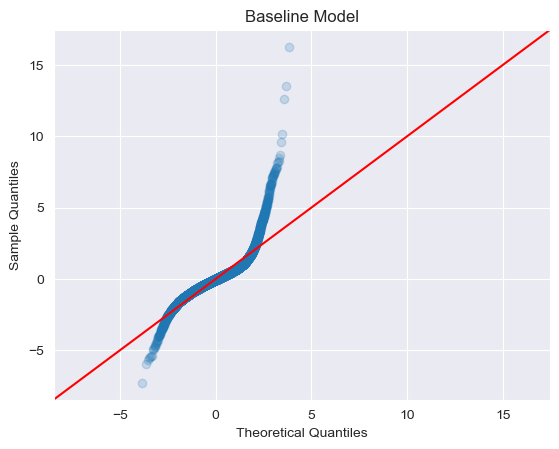

In [46]:
residuals = baseline_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, fit=True, line='45', alpha=0.2)
plt.title('Baseline Model', size=12);

The red dashed line in the Q-Q plot represents the expected normal distribution. Points following it suggest data normality. Deviations indicate non-normality. If points rise, it means heavier tails with more extremes. If points dip, lighter tails with fewer extremes. Our data has heavier tails, more extremes, deviating from normality, influencing method choice and exploration.

**The effect of the house design i.e (number of bedrooms, number of bathrooms and number of floors) have on the sale value of the houses in King County.**

In [47]:
#Simple linear regression to show the effect of number of bedrooms on sale value of the houses
y = kc_house_data['price']
x = kc_house_data['bedrooms']

#add constant to the independent variable(constant)
x = sm.add_constant(x)

#create a simple linear regression model
simple_model_bedrooms = sm.OLS(y,x).fit()

print(simple_model_bedrooms.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     2351.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:23:25   Log-Likelihood:            -3.0274e+05
No. Observations:               21345   AIC:                         6.055e+05
Df Residuals:                   21343   BIC:                         6.055e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.059e+05   9298.230     11.395      0.0

**Observation:**

We utilized the "bedrooms" column to investigate how the quantity of bedrooms impacts house prices in King County. The findings from this model indicate that a rise in the number of bedrooms corresponds to a $129,000 increase in the house price.

Nevertheless, the R-squared value for this model stands at around 9.9%, suggesting a limited degree of explained variation and thus making it less suitable as a best-fit model. Consequently, we will employ multiple linear regression to enhance the model's predictive performance.


In [48]:
#Multiple regression model using bathrooms, bedrooms & floor
formula = "price ~ bathrooms + bedrooms + floors"

# Create and fit the linear regression model
multiple_model_design = sm.OLS.from_formula(formula, data=kc_house_data).fit()

print(multiple_model_design.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     2743.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:23:30   Log-Likelihood:            -3.0037e+05
No. Observations:               21345   AIC:                         6.008e+05
Df Residuals:                   21341   BIC:                         6.008e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.768e+04   9492.700     -3.970      0.0

**Observation:**

The multiple regression model shows a notable improvement with an R-squared value of approximately 27.8%, compared to the simple regression model with an R-squared of 9.9%. This suggests that the combination of independent variables (bathrooms, bedrooms, and floors) collectively explains a larger portion of the variation in house prices.

The coefficient for bathrooms reveals that an increase in the number of bathrooms is associated with a substantial increase in house prices, approximately USD240,400 per additional bathroom.
Similarly, the coefficient for bedrooms indicates that more bedrooms contribute positively to house prices, with each additional bedroom associated with an increase of about $21,850.

However, the coefficient for floors, while indicating a decrease in house price with each additional floor (approximately -$3,273), has a p-value of 0.477. Comparing this p-value to the commonly used alpha level of 0.05 suggests that the number of floors may not have a statistically significant impact on house prices in this model. In other words, the evidence to support the influence of floors on house prices is not strong enough based on the current data.

**The effect of dimensions of the house and lot size on the price of houses.**

In [49]:
#Simple linear regression to show effect of sqft_living has on sale value of house
y = kc_house_data['price']
x2 = kc_house_data['sqft_living']

#add constant to the independent variable(constant)
x2 = sm.add_constant(x2)

#create a simple linear regression model
simple_model_sqft_living = sm.OLS(y,x2).fit()

print(simple_model_sqft_living.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.069e+04
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:23:34   Log-Likelihood:            -2.9662e+05
No. Observations:               21345   AIC:                         5.932e+05
Df Residuals:                   21343   BIC:                         5.933e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.603e+04   4462.311    -10.316      

**Observation:**

We employed the "sqft_living" column to examine the influence of living space square footage on house prices in King County. The results of this model indicate that for each additional square foot of living space, there is an approximate increase of $281.54 in house price.

Moreover, the R-squared value for this model is approximately 49.2%, indicating a substantial degree of explained variation and thus making it a suitable best-fit model. To further enhance predictive performance, we will explore multiple linear regression for comparison.

This model exhibits a strong multicollinearity which could lead to instability in the model's coefficients and make it challenging to interpret the individual effects of "sqft_living" accurately.

In [50]:
#Multiple regression model using sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15
formula_2 = "price ~ sqft_living + sqft_lot + sqft_above + sqft_basement + sqft_living15 + sqft_lot15"

# Create and fit the linear regression model
multiple_model_2 = sm.OLS.from_formula(formula_2, data=kc_house_data).fit()

print(multiple_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     3603.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:23:37   Log-Likelihood:            -2.9638e+05
No. Observations:               21345   AIC:                         5.928e+05
Df Residuals:                   21338   BIC:                         5.928e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.026e+05   5462.508    -18.786

**Observation:**

The multiple regression model significantly improves the explanatory power with an R-squared of about 50.3%, surpassing the simple model's 49.2%. Notably, "sqft_living" remains a highly significant predictor, with each additional square foot contributing to a substantial house price increase of approximately USD 230.6. Similarly, "sqft_living15" indicates that an expansion in living space among the nearest 15 neighbors leads to an approximately USD 76.96 increase in house prices.

Conversely, "sqft_lot15" suggests that an increase in lot space for the nearest 15 neighbors is associated with a modest decrease in house price, approximately USD 0.79. However, it's worth noting that the variables "sqft_above" and "sqft_basement" may not be statistically significant predictors of house prices in this model, as their coefficients have p-values greater than 0.05. Therefore, their impact on house prices should be approached with caution or considered for potential removal in further analysis.


**The effect of the age and grade of the house on price.**

In [83]:
# Use pd.get_dummies to one-hot encode the categorical column in X_iterated
columns_to_drop = ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
                   'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
                   'long', 'sqft_living15', 'sqft_lot15', 'season', 'numeric_waterfront', 'numeric_condition',
                   'view_rating_numeric','month','year', 'date', 'sqft_living','numeric_grade']

# Use isin to create a boolean mask for columns to keep
columns_to_keep = ~kc_house_data.columns.isin(columns_to_drop)

# Build the multiple linear regression model
X_iterated_ = kc_house_data[['age', 'grade']]

# Apply the mask to select columns to keep
X_iterated_ = kc_house_data.loc[:, columns_to_keep]

# Apply one-hot encoding to the grade column
X_iterated_ = pd.get_dummies(X_iterated_, columns=['grade', 'condition'])

# Drop grade_7 Average  as a reference category: this is the middle point of the grading metric and it is the grade with the highest frequency in our data
X_iterated_.drop(columns=['grade_7 Average', 'condition_Average'], inplace=True)
X_iterated_ = X_iterated_.astype(int)

# Generate the regression model
X_iterated_ = sm.OLS(y, sm.add_constant(X_iterated_))
iterated_results_ =  X_iterated_.fit()

print(iterated_results_.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     2075.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:55:20   Log-Likelihood:            -2.9468e+05
No. Observations:               21345   AIC:                         5.894e+05
Df Residuals:                   21330   BIC:                         5.895e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.354e+05   4

**Observation:**

This model's fit has an rsquared of 57.7% indicating a moderate fit.

It also seems like for the increase in age of the house, the price of the house increases by USD3,017.

Here are the three highest positive effects on house prices and the three lowest negative effects based on the provided coefficients:

Highest Positive Effects:

Grade 13 Mansion: Having a Grade 13 Mansion adds the highest positive effect to house prices, with an estimated increase of approximately 3,359,000 dollars.

Grade 12 Luxury: Grade 12 Luxury comes next, contributing around 1,906,000 dollars to house prices.

Grade 11 Excellent: A Grade 11 Excellent is also associated with a substantial positive effect, with an estimated increase of about 1,191,000 dollars in house price.

Lowest Negative Effects:

Grade 6 Low Average: Grade 6 Low Average has the highest negative effect among the lowest, reducing the estimated house price by roughly 166,200 dollars.

Grade 5 Fair: Grade 5 Fair is the next lowest negative effect, decreasing the estimated price by approximately 243,500 dollars.

Grade 4 Low: Grade 4 Low follows, with a negative effect estimated at around 297,500 dollars on house price.

**`MULTIPLE REGRESSION MODELS WITH CATEGORICAL DATA`**

In [52]:
# Identifying categorical data

categoricals = kc_house_data.select_dtypes("object")

categoricals

,waterfront,view,condition,grade,season
0,NO,NONE,Average,7 Average,Fall
1,NO,NONE,Average,7 Average,Winter
2,NO,NONE,Average,6 Low Average,Winter
3,NO,NONE,Very Good,7 Average,Winter
4,NO,NONE,Average,8 Good,Winter
...,...,...,...,...,...
21590,NO,NONE,Average,9 Better,Spring
21591,NO,NONE,Average,8 Good,Winter
21592,NO,NONE,Average,8 Good,Spring
21593,NO,NONE,Average,8 Good,Winter


In [53]:
# Finding highest positive correlation in numerial data
kc_house_data.corr(numeric_only=True)["price"].nlargest()

price            1.000000
sqft_living      0.701617
numeric_grade    0.668679
sqft_above       0.604672
sqft_living15    0.584170
Name: price, dtype: float64

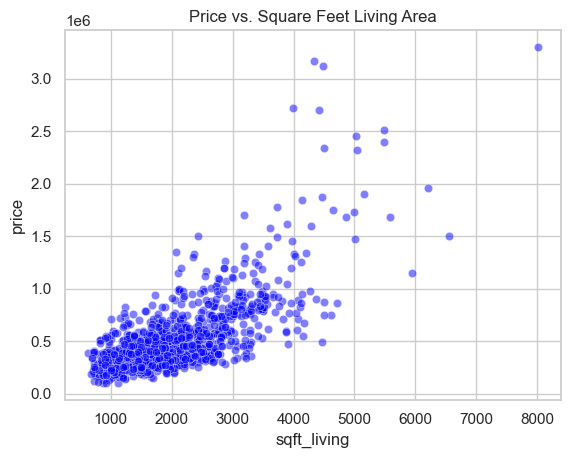

In [54]:
# Plot a scatter plot for correlation
sampled_data = kc_house_data.sample(1000, random_state=1)
sns.set(style="whitegrid")
plt.title('Price vs. Square Feet Living Area')
sns.scatterplot(data=sampled_data, x='sqft_living', y='price', alpha=0.5, color='blue', marker='o');

In [55]:
# Use sqft_living as baseline model
baseline_results = simple_model_sqft_living

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.069e+04
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:24:15   Log-Likelihood:            -2.9662e+05
No. Observations:               21345   AIC:                         5.932e+05
Df Residuals:                   21343   BIC:                         5.933e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.603e+04   4462.311    -10.316      

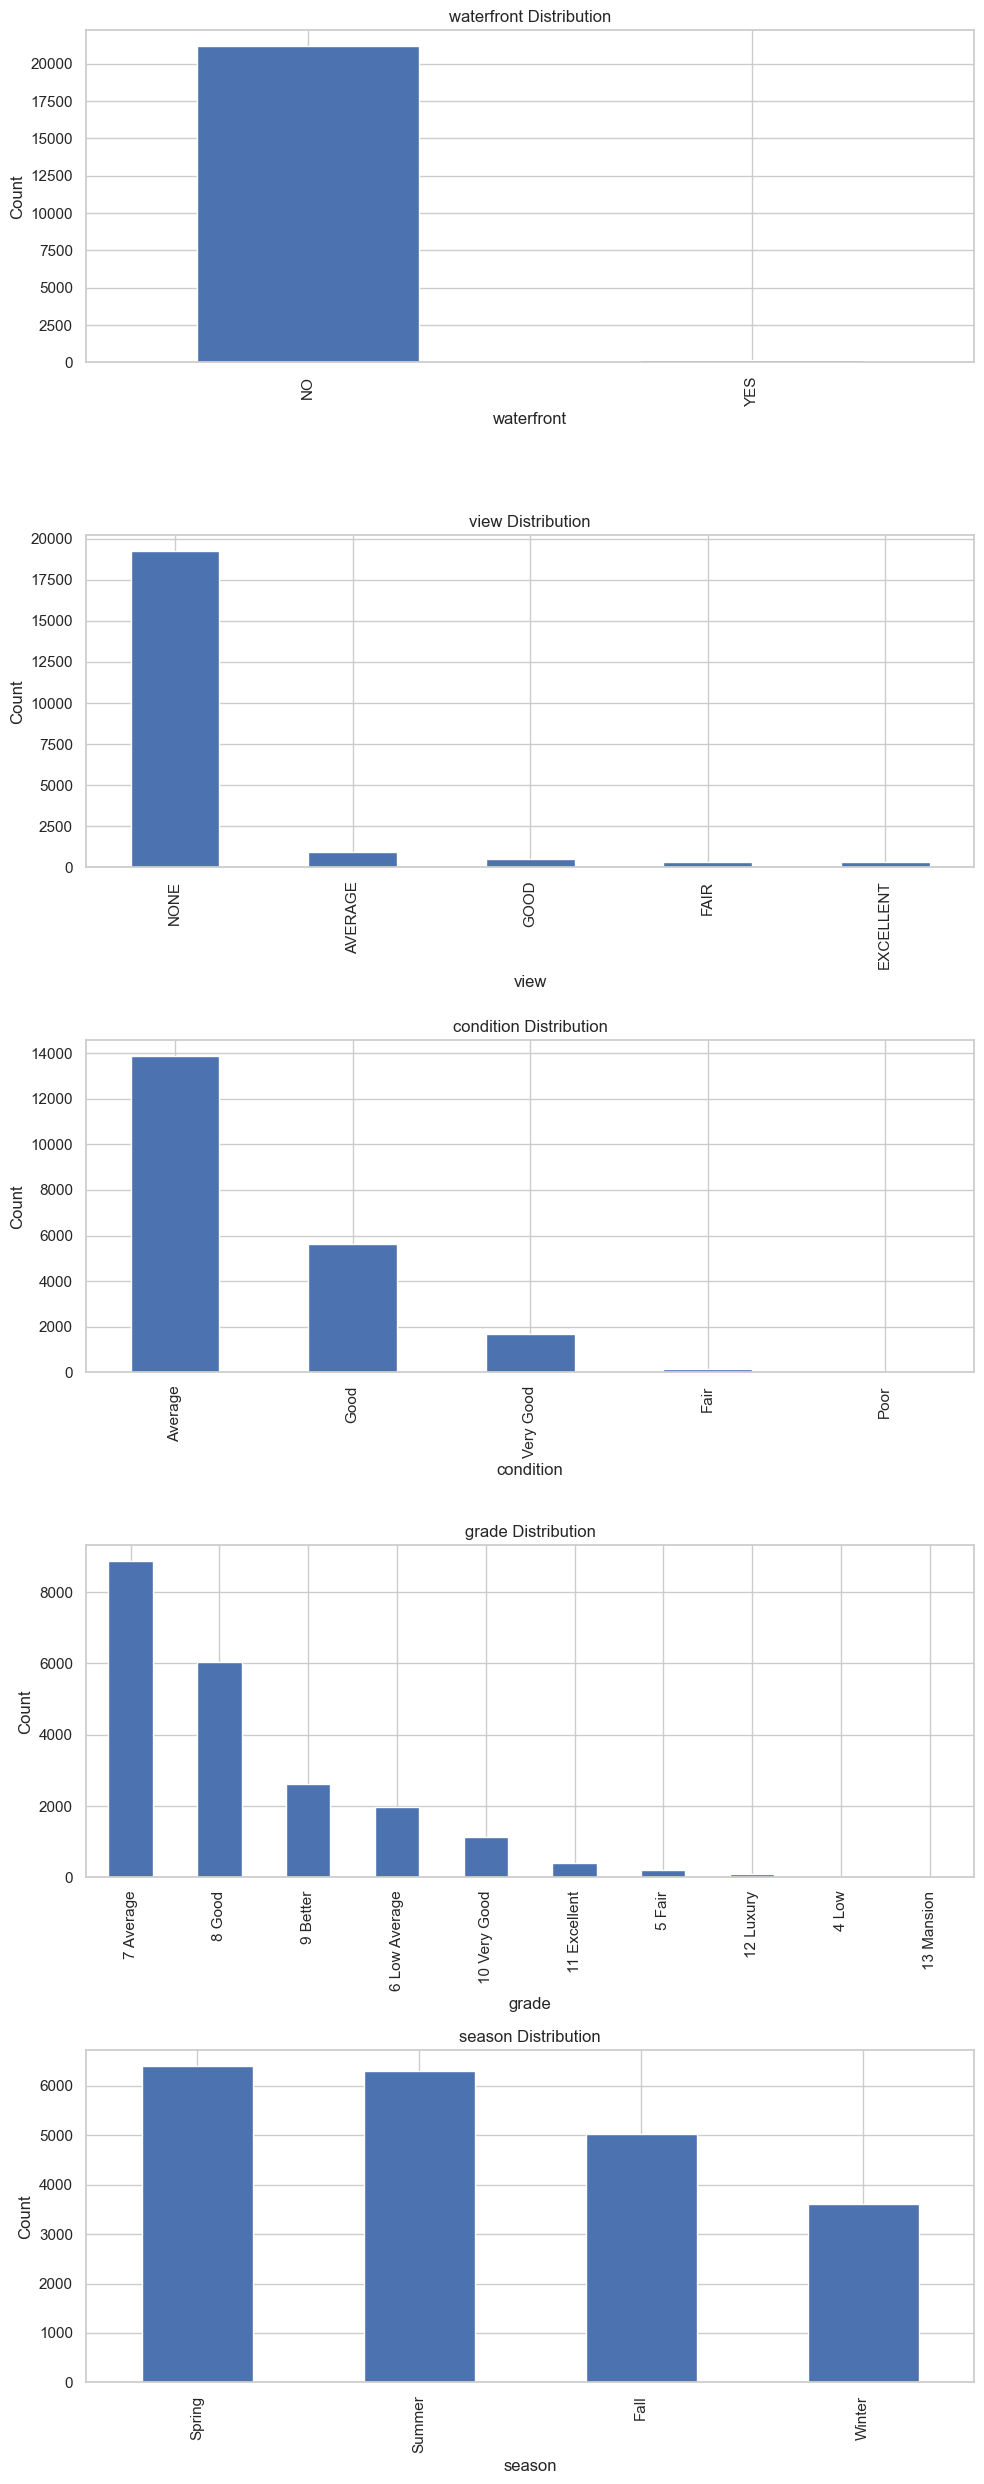

In [56]:
# Plot categorical data

categorical_features = kc_house_data.select_dtypes("object").columns

num_rows = len(categorical_features)
num_cols = 1

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 5 * 5))

for index, feature in enumerate(categorical_features):
    ax = axes[index] if num_rows > 1 else axes
    kc_house_data[feature].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'{feature} Distribution')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show();

**`Categorical data selection criteria:`**

We employed an elimination method for categorical data selection based on the following rationale:

1. View and Waterfront Categories: These categories exhibited bias, with a significant number of values concentrated in "NONE" and "NO." This concentration would not establish a suitable reference category for the model.
2. Condition Category: The condition is contingent on the current state of the house. Given the absence of sufficient data on the years of the last renovation, we cannot accurately assess whether these current condition categories are reliable indicators.
3. Seasons Category: "Seasons" was deemed unsuitable as a categorical variable for this model because it lacks an incremental nature.

* Given these considerations and the need for a well-defined metric, we selected the "grade" category. This category represents the construction quality of improvements according to King County's Residential Glossary of Terms ([source](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g)), making it a more robust choice for our model.







In [57]:
# Identify the x iterated by using the numerical data with the highest correlation and the categorical data of choice
X_iterated = kc_house_data[['sqft_living', 'grade']]
X_iterated

,sqft_living,grade
0,1180,7 Average
1,2570,7 Average
2,770,6 Low Average
3,1960,7 Average
4,1680,8 Good
...,...,...
21590,3510,9 Better
21591,1310,8 Good
21592,1530,8 Good
21593,2310,8 Good


In [72]:
# Use pd.get_dummies to one-hot encode the categorical column in X_iterated
columns_to_drop = ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'numeric_grade',
                   'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
                   'long', 'sqft_living15', 'sqft_lot15', 'season','numeric_waterfront', 'numeric_condition', 'numeric_grade,' , 'view_rating_numeric','month','year', 'date', 'age']

# Use isin to create a boolean mask for columns to keep
columns_to_keep = ~kc_house_data.columns.isin(columns_to_drop)

# Apply the mask to select columns to keep
X_iterated = kc_house_data.loc[:, columns_to_keep]

# Apply one-hot encoding to the grade column
X_iterated = pd.get_dummies(X_iterated, columns=['grade'])

# Drop grade_7 Average  as a reference category: this is the middle point of the grading metric and it is the grade with the highest frequency in our data
X_iterated.drop(columns=['grade_7 Average'], inplace=True)

# View x_iterated values
X_iterated = X_iterated.astype(int)
X_iterated

,sqft_living,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_8 Good,grade_9 Better
0,1180,0,0,0,0,0,0,0,0,0
1,2570,0,0,0,0,0,0,0,0,0
2,770,0,0,0,0,0,0,1,0,0
3,1960,0,0,0,0,0,0,0,0,0
4,1680,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
21590,3510,0,0,0,0,0,0,0,0,1
21591,1310,0,0,0,0,0,0,0,1,0
21592,1530,0,0,0,0,0,0,0,1,0
21593,2310,0,0,0,0,0,0,0,1,0


In [73]:
# Build the multiple linear regression model
X_iterated = sm.OLS(y, sm.add_constant(X_iterated))
iterated_results =  X_iterated.fit()

print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     2968.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:34:16   Log-Likelihood:            -2.9455e+05
No. Observations:               21345   AIC:                         5.891e+05
Df Residuals:                   21334   BIC:                         5.892e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.36e+05   5

**Observation:**

This multiple regression model's r-squared is 58.2%. This model is improved from the baseline model that had an r-squared of 49.2%. The constant intercept represents the baseline price, estimated at approximately $136,000 when all other variables are zero. This serves as the starting point for house prices.

The size of the living space, as measured by square footage (sqft_living), has a significant positive impact on house prices. For each additional square foot, there's an estimated price increase of around $157.43, assuming all other factors remain constant.

Grade categories play a substantial role in determining house prices. Grades 10 to 13, which represent Very Good, Excellent, Luxury, and Mansion, lead to substantial price increases compared to the average grade whish was the reference category.. For instance, a house with a grade of 13 (Mansion) is associated with an estimated price increase of approximately $2,397,000 compared to the refernce category. Conversely, lower-grade categories (e.g., Low, Fair) tend to decrease the estimated price with comparison to grade averarage.

However, it's essential to note that the coefficient for grade_4 Low is not statistically significant, as indicated by a high p-value (0.276). This suggests that the effect of grade_4 on house prices might not be reliable.


Overall, this model highlights the importance of house size sqft_living and grade in influencing house prices, with higher-grade categories contributing significantly to price appreciation.

In [74]:
categoricals

,waterfront,view,condition,grade,season
0,NO,NONE,Average,7 Average,Fall
1,NO,NONE,Average,7 Average,Winter
2,NO,NONE,Average,6 Low Average,Winter
3,NO,NONE,Very Good,7 Average,Winter
4,NO,NONE,Average,8 Good,Winter
...,...,...,...,...,...
21590,NO,NONE,Average,9 Better,Spring
21591,NO,NONE,Average,8 Good,Winter
21592,NO,NONE,Average,8 Good,Spring
21593,NO,NONE,Average,8 Good,Winter


**The total effect of the variables with high impact as observed in the previous models on the price of the houses.**

In [75]:
#Multiple regression model using sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15
formula_4 = """price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view +
               condition + grade + sqft_above + sqft_basement +
                sqft_living15 + sqft_lot15 + age"""

# Create and fit the linear regression model
multiple_model_4 = sm.OLS.from_formula(formula_4, data=kc_house_data).fit()

print(multiple_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     1640.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:34:25   Log-Likelihood:            -2.9159e+05
No. Observations:               21345   AIC:                         5.832e+05
Df Residuals:                   21316   BIC:                         5.835e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3.53

**Observation:**

The latest model exhibits an enhanced R-squared value of 68.2%, signifying a stronger fit. The coefficients now offer improved estimations of how each independent variable impacts the price for each unit increase. Given the considerable number of independent variables in this model, we will proceed to visualize each coefficient individually to present a more comprehensive summary of the results.

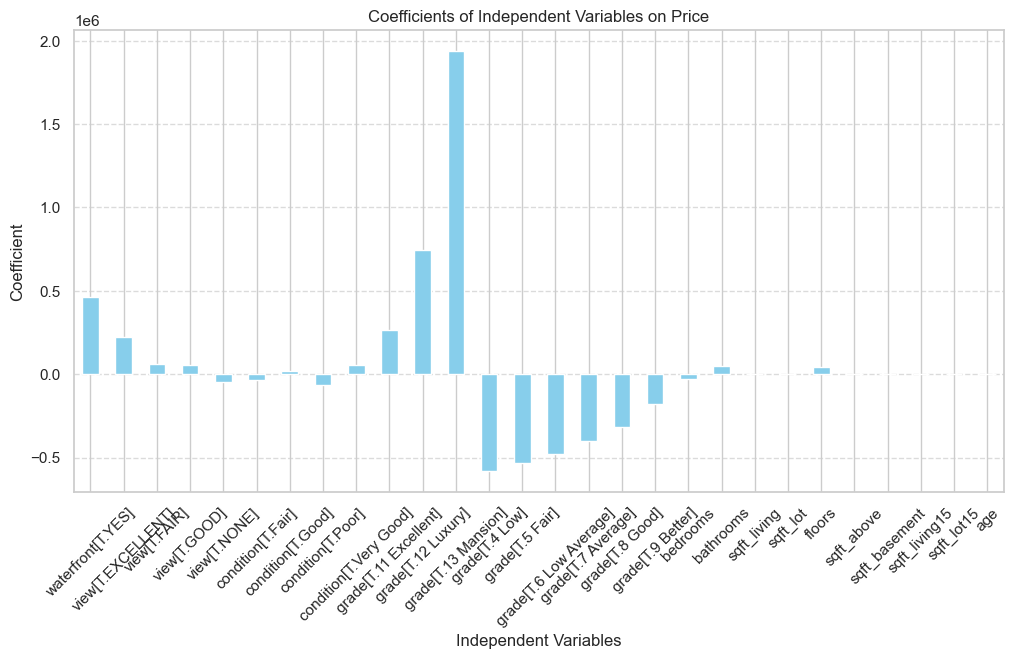

In [76]:
# Extract the coefficients of the independent variables from the regression summary
coefficients = multiple_model_4.params.drop('Intercept')  

# Create a bar graph
plt.figure(figsize=(12, 6))
coefficients.plot(kind='bar', color='skyblue')
plt.title('Coefficients of Independent Variables on Price')
plt.xlabel('Independent Variables')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Observation:**

The bar graph illustrates that Grade 13 (Mansion) exerts the most substantial positive impact on house prices, closely followed by Grade 12 (Luxury), Grade 11 (Excellent), Condition (Very Good), and the presence of a waterfront view, as well as an Excellent view. Conversely, grades ranging from average to low are associated with the most pronounced negative influence on house prices.